# Entregável 3 de Visão Computacional e Robótica


Entrega até 22/03

*Importante* você vai precisar do Git LFS e do Scikit-Learn para fazer estes exercícios. No Linux já está instalado.

No `conda`: 

    conda install -c conda-forge git-lfs

    conda install -c conda-forge scikit-learn



Vai ser feito no grupo definido *por sorteio*

Nesta semana vamos trabalhar com um assunto extremamente atual: reconhecimento de objetos e rastreamento


Referências:

[https://www.pyimagesearch.com/2018/07/30/opencv-object-tracking/](https://www.pyimagesearch.com/2018/07/30/opencv-object-tracking/)

[https://github.com/iArunava/YOLOv3-Object-Detection-with-OpenCV/](https://github.com/iArunava/YOLOv3-Object-Detection-with-OpenCV/)

[https://www.pyimagesearch.com/2017/09/11/object-detection-with-deep-learning-and-opencv/](https://www.pyimagesearch.com/2017/09/11/object-detection-with-deep-learning-and-opencv/)

Ouça a explicacão do professor sobre rastreamento e deteção

In [8]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import time as t
import sys
import math
import os
print ("OpenCV Version : %s " % cv2.__version__)
print("Trabalhando em: ", os.getcwd())

OpenCV Version : 4.5.1 
Trabalhando em:  C:\Users\mirwo\robot\src\robot21.1\aula03


### 1. Ponto de fuga

Robôs que trabalham dentro de prédios precisam saber seguir corredores.

Uma das maneiras de fazer isso é o robô alinhar o centro de sua câmera ao ponto de fuga do corredor, para que sua trajetória seja aproximadamente paralela às paredes do mesmo.


O ponto de fuga é aquele para o qual as retas paralelas parecem convergir

Dada a seguinte imagem de um corredor:

![Imagem do corredor](ponto_fuga.png)

Podemos traçar as linhas geradas pela perspectiva, seu ponto de encontro será o ponto de fuga.



### Revisão: reta passando por dois pontos

![Encontro de duas retas](retas.png)


Seja o ponto $A:(a_x, a_y)$ e o ponto $B:(b_x, b_y)$

Queremos encontrar uma reta $r: y = mx + h$ que passa por $A$ e $B$, em que $m$ é o *coeficiente angular* e $h$ é o intercepto ou coeficiente linear da reta.

Temos que:

$m = \frac{\Delta_y}{\Delta_x} = \frac{b_y - a_y}{b_x - a_x}$

Uma vez encontrado o valor de $m$, a substituição a seguir permite encontrar a equação da reta:

$m = \frac{y - a_y}{x - a_x}$

$mx - ma_x = y - a_y$

$mx = y - a_y + ma_x$

$y = mx -ma_x + a_y$

$h = a_y - ma_x$


$y = mx - ma_x + a_y$

### Interseção de duas retas

Temos que na interseção as duas retas se encontram num ponto $(x_i, y_i)$

Sejam as retas $r1: y = m1x + h1$ e $r2: y = m2x + h2$

Vamos encontrar o ponto $x_i$ em que os valores de $y_i$ serão iguais:

$m1x_i + h1 = m2x_i + h2$

$(m1 - m2)x_i = h2 - h1$

$x_i = \frac{h2 - h1}{m1 - m2}$

$y_i = m1x_i + h1$

**Dados de teste:**

Caso precise testar seu código, você pode conferir com estes valores. As retas definidas por pontos $r1: (P_1, P_2)$ e $r2: (Q_1, Q_2)$, para os valores:

```python

p1 = (3.0, 2.5)
p2 = (4.0, 0.6)
q1 = (1.0, 2.4)
q2 = (0.6, 1.1)
```

Encontram-se no ponto `(1.7572 4.8611)`


Pede-se: 

* A partir do ponto para onde convergem as linhas do corredor, marque o ponto de fuga no vídeo.  Você precisa mostrar as retas que vão convergir.


**Sugestão:** 

A partir do coeficiente angular, selecionar uma reta mais à esquerda e uma mais à direita para encontrar a interseção.

Lembre-se de que na OpenCV o eixo y fica **para baixo**, por isso os coeficientes angulares se comportam como na figura abaixo:

![Valores de coeficiente angular](coeficientes_m.png)

Lembre-se de que, no espaço de cores HSV, o vermelho se encontra no início e no fim da escala do componente H. Se você estiver filtrando vermelho em um só dos extremos pode não ter bons resultados

Vídeo para teste:


[Vídeo de line following](https://github.com/Insper/robot21.1/blob/main/aula03/line_following.mp4)


### 2. Executar o exemplo de rede neural

Há três exemplos: `mobilenet_detection`, `yolov3_detection` e `tracking`.


Execute apenas o exemplo `object_detection_webcam.py`  que está na pasta `mobilenet_detection`

Depois de rodar o demos, estude o notebook  [Demo_Imagenet.ipynb](Demo_Imagenet.ipynb)

## 3. Detectar vacas em perigo


Você deve detectar se há uma situação de perigo ou não perigo para as vacas.

Perigo
<img src="perigo.jpg" width=50%></img>

Não perigo
<img src="nao_perigo.jpg" width=50%></img>



#### Orientações

É uma situação de perigo quando: 
* Há mais lobos do que vacas
* As vacas estão contidas na bounding box dos lobos, conforme as figuras

Considere que toda detecção de `dog`, `horse`  e `sheep` também será de lobos.



Baixe o vídeo [ cow_wolf.mp4 neste endereço](Baixe o arquivo em https://github.com/Insper/robot20/blob/master/media/cow_wolf.mp4)


Implemente a seguinte funcionalidade: sempre que o objeto identificado em (2) estiver presente por mais que 5 frames seguidos, desenhe um retângulo fixo ao redor dele. 

# 4. Aproximar faixa amarela por uma reta e direção

Você deve:
aproximar a faixa amarela do centro da pista por uma única reta

Para isso sugerimos que faça uma *regressão*  das coordenadas de onde os pixels são amarelos

Em seguida use este resultado para também esterçar o robô

In [3]:
frames = """frame0004.png  frame0476.png  frame1076.png  frame4256.png  frame5832.png  frame6928.png
frame0160.png  frame0916.png  frame4164.png  frame4624.png  frame5868.png"""

In [5]:
frames = frames.split()

In [15]:
import os.path
bgr_frames = [cv2.imread(os.path.join("yellow_lane",f)) for f in frames]

In [17]:
rgb_frames = [cv2.cvtColor(f, cv2.COLOR_BGR2RGB) for f in bgr_frames]

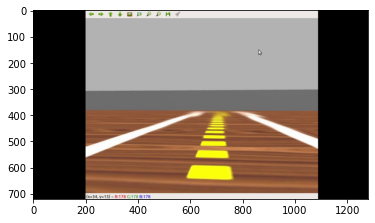

In [18]:
plt.imshow(rgb_frames[0])